In [2]:
from funcs.notebook import *
df = pd.read_csv("../results/2020_02_obsdurs.csv")
hist = pd.DataFrame()

In [3]:
bins = np.linspace(0,1,1231)
bins

array([0.00000000e+00, 8.13008130e-04, 1.62601626e-03, ...,
       9.98373984e-01, 9.99186992e-01, 1.00000000e+00])

In [4]:
len(bins)

1231

In [355]:
for i, row in df.iterrows():
    lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    hist[f"{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}"] = counts

In [356]:
hist.to_csv(f"../results/observedtimes/hist_1231_obst.csv")

(0.0, 1.0)

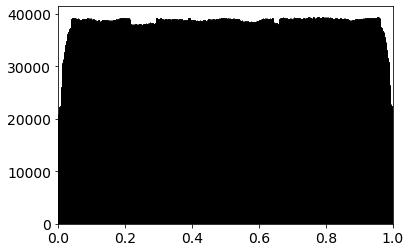

In [357]:
plt.bar((bins[:-1]+bins[1:]) / 2, hist.sum(axis=1).values, width = bins[1]-bins[0],facecolor="w", edgecolor="k")
plt.xlim(0,1)

In [358]:
flares = pd.read_csv("../results/2020_02_flares_vetted.csv")
flares["real?"] = flares["real?"].fillna(0).astype(float)
ff = flares[(flares["real?"]==1.)]
ff.shape

(1295, 19)

In [359]:
phases = []
for j, row in ff.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)
 

[Errno 2] No such file or directory: '../results/observedtimes/TOI-700_27_0_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.c

In [361]:
counts, bins = np.histogram(phases, bins=bins)
cumfreq = (counts / hist.sum(axis=1).values).cumsum()
lin = np.linspace(cumfreq[0],np.max(cumfreq),len(bins)-1)

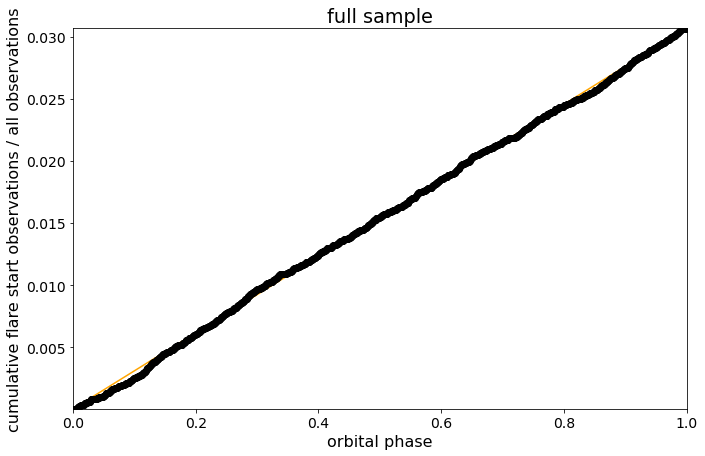

In [367]:
plt.figure(figsize=(11,7))
plt.errorbar((bins[:-1]+bins[1:]) / 2,
             cumfreq,#counts / hist.sum(axis=1).values, 
             #yerr = np.sqrt(counts) / hist.sum(axis=1).values,
             c='k',fmt="o")
plt.plot((bins[:-1]+bins[1:]) / 2, lin, c="orange")
plt.xlim(0,1)
plt.ylabel("cumulative flare start observations / all observations")
plt.xlabel("orbital phase")
plt.title("full sample")
plt.ylim(cumfreq[0],np.max(cumfreq))
plt.savefig("../results/plots/cumulative_flare_phases_full_sample.png", dpi=300)

In [372]:
f = pd.DataFrame({"freq":counts / hist.sum(axis=1).values, "phase":(bins[:-1]+bins[1:]) / 2})
h1 = hist.sum(axis=1).values[:615].sum()
h2 = hist.sum(axis=1).values[615:].sum()
phases = np.array(phases)
f1 = np.where((phases<.25) | (phases>.75))[0].shape[0] 
f2 = np.where((phases>.25) & (phases<.75))[0].shape[0]
e1, e2 = np.sqrt(f1)/h1, np.sqrt(f2)/h2
print(fr"{f1 / h1:.2e} +/- {e1:.2e}")
print(fr"{f2 / h1:.2e} +/- {e2:.2e}")

2.48e-05 +/- 1.03e-06
2.53e-05 +/- 1.03e-06


In [376]:
_ = f1 / h1 + e1
fr"{_:.2e}"

'2.59e-05'

# AU Mic only

In [235]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
# aumic = pd.concat([aumic1,aumic27])
aumic = aumic[aumic.final==1]

In [236]:
aumic.shape

(115, 20)

In [237]:
aumic = aumic.sort_values(by="ed_rec", ascending=False).iloc[:57]

In [238]:
bins = np.linspace(0,1,57)
# bins

In [239]:
aumicphases = pd.DataFrame()

In [240]:
for qcs in [27]:
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts

(0.0, 1.0)

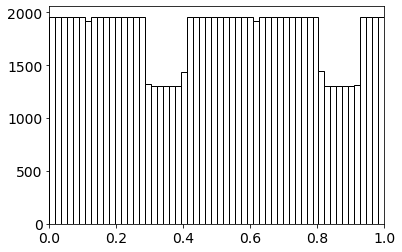

In [241]:
plt.bar((bins[:-1]+bins[1:]) / 2, 
        aumicphases.sum(axis=1).values, 
        width = bins[1]-bins[0],
        facecolor="w", edgecolor="k")
plt.xlim(0,1)

In [242]:
phases = []
for j, row in aumic.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)

In [243]:
counts, bins = np.histogram(phases, bins=bins)
cumfreq = (counts / aumicphases.sum(axis=1).values).cumsum()
lin = np.linspace(cumfreq[0],np.max(cumfreq),len(bins)-1)
# lin

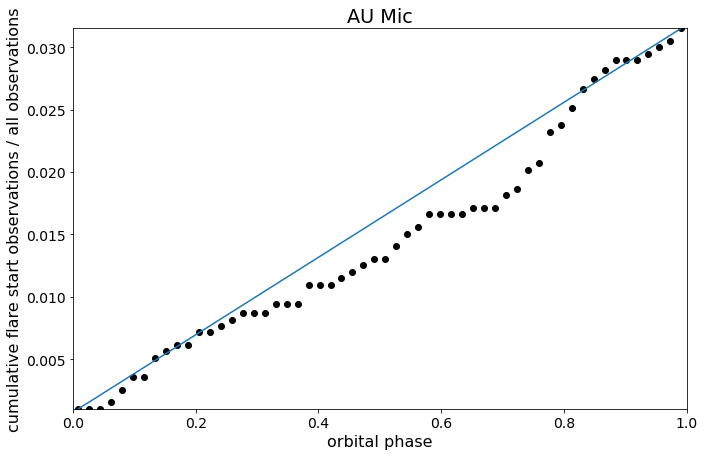

In [244]:
plt.figure(figsize=(11,7))
plt.scatter((bins[:-1]+bins[1:]) / 2,
             cumfreq, #(counts / aumicphases.sum(axis=1).values), 
            # yerr = np.sqrt(counts) / aumicphases.sum(axis=1).values,
             c='k')#,fmt="o")
plt.plot((bins[:-1]+bins[1:]) / 2,lin)
plt.xlim(0,1)
plt.ylabel("cumulative flare start observations / all observations")
plt.xlabel("orbital phase")
plt.title("AU Mic")
plt.ylim(cumfreq[0],np.max(cumfreq))
plt.savefig("../results/plots/AUMic_cumulative_flare_phases_27sec_only_57largest.png", dpi=300)

# Histograms

In [157]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic = pd.concat([aumic1,aumic27])
aumic = aumic[aumic.final==1]

In [158]:
aumic.shape

(215, 20)

In [159]:
aumic = aumic.sort_values(by="ed_rec", ascending=True).iloc[:108]

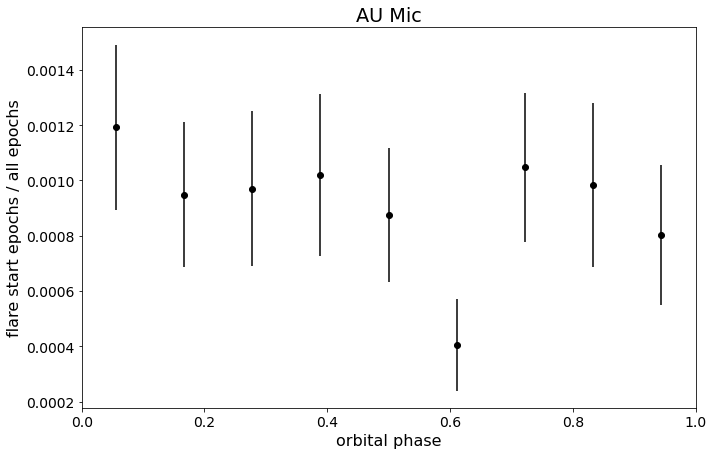

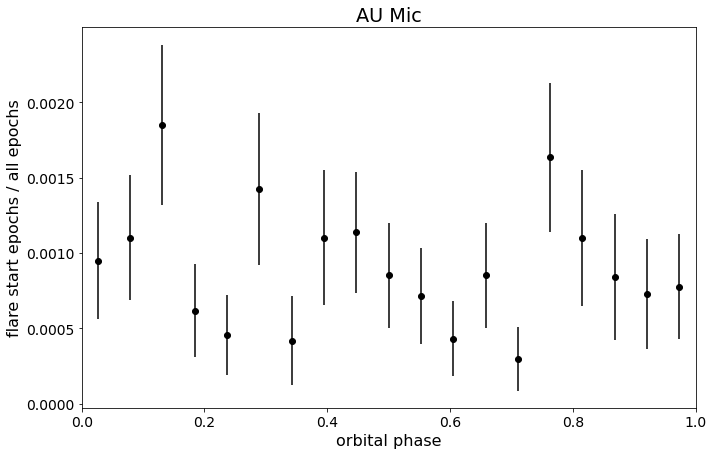

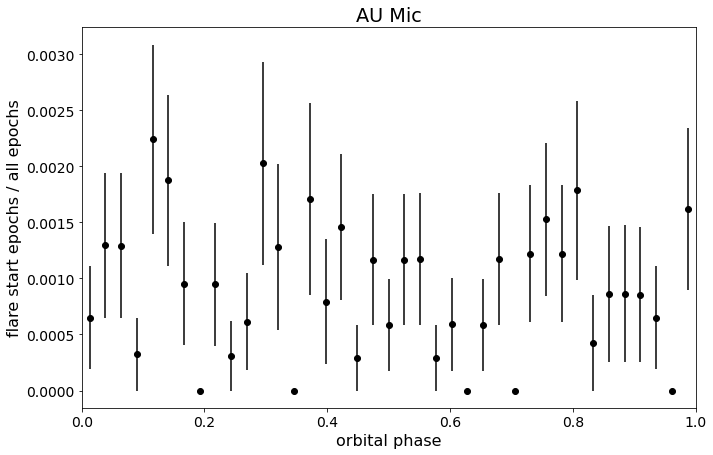

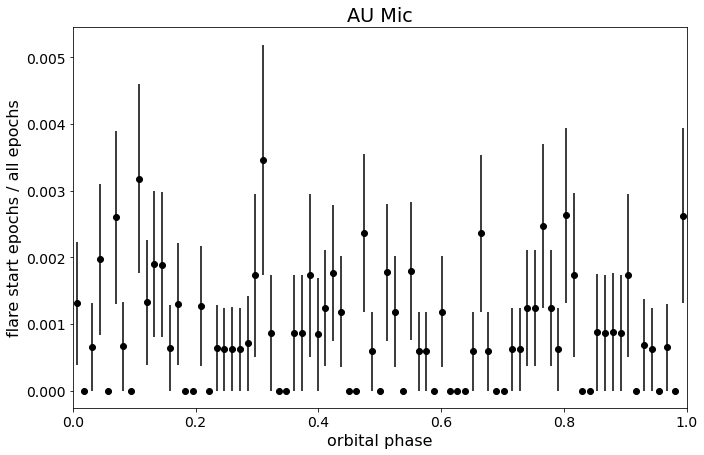

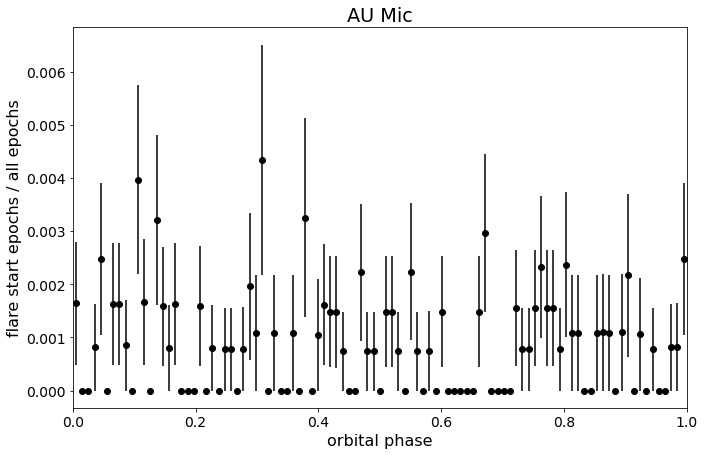

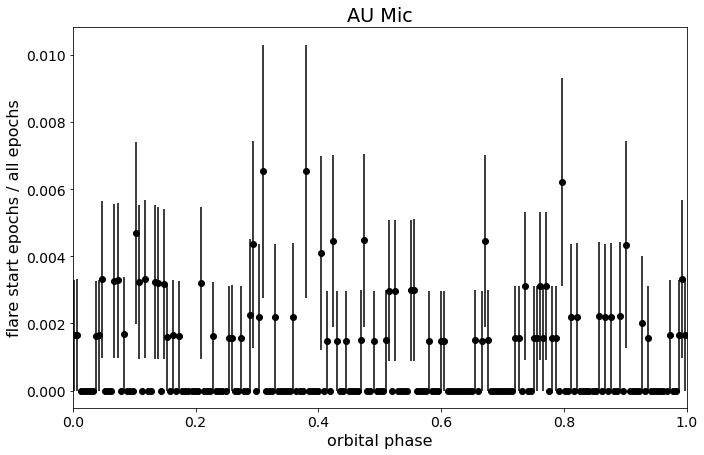

In [161]:
for b in [10,20,40,80,100,200]:
    bins = np.linspace(0,1,b)
    aumicphases = pd.DataFrame()
    for qcs in [1,27]:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
        counts, bins = np.histogram(lc.phase.values, bins=bins)
        aumicphases[qcs] = counts
        
        
        
    phases = []
    for j, row in aumic.iterrows():
        try:
            lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
            phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
        except Exception as e:
            print(e)
            phases.append(np.nan)  
            
    counts, bins = np.histogram(phases, bins=bins)

    plt.figure(figsize=(11,7))
    plt.errorbar((bins[:-1]+bins[1:]) / 2,
                 counts / aumicphases.sum(axis=1).values, 
                 yerr = np.sqrt(counts) / aumicphases.sum(axis=1).values,
                 c='k',fmt="o")
    # plt.plot((bins[:-1]+bins[1:]) / 2,lin)
    plt.xlim(0,1)
    plt.ylabel("flare start epochs / all epochs")
    plt.xlabel("orbital phase")
    plt.title("AU Mic")
    # plt.ylim(cumfreq[0],np.max(cumfreq))
    plt.savefig(f"../results/plots/AUMic_flare_phases_{b}_bins_108_smallest.png", dpi=300)

# KS-Test

In [211]:
from scipy.stats import ks_2samp, kstest

In [212]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic = pd.concat([aumic1,aumic27])
aumic = aumic[aumic.final==1]

In [213]:
aumic.shape

(215, 20)

In [214]:
bins = np.linspace(0,1,50)

In [215]:
aumicphases = pd.DataFrame()

In [216]:
for qcs in [1,27]:
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts

(0.0, 1.0)

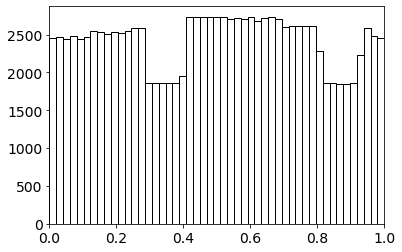

In [217]:
plt.bar((bins[:-1]+bins[1:]) / 2, 
        aumicphases.sum(axis=1).values, 
        width = bins[1]-bins[0],
        facecolor="w", edgecolor="k")
plt.xlim(0,1)

In [218]:
aumic_lower = aumic.sort_values(by="ed_rec", ascending=True).iloc[:107]
aumic_upper = aumic.sort_values(by="ed_rec", ascending=False).iloc[:108]

In [219]:
lower_phases, upper_phases = [], []
for aumic, phases in [(aumic_lower, lower_phases),
                      (aumic_upper, upper_phases)]:
    for j, row in aumic.iterrows():
        try:
            lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
            phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
        except Exception as e:
            print(e)
            phases.append(np.nan)

In [222]:
counts, bins = np.histogram(lower_phases, bins=bins)
freq = counts / aumicphases.sum(axis=1).values
freq

array([0.00081466, 0.00040634, 0.00123102, 0.00160966, 0.00041034,
       0.00283057, 0.0015674 , 0.0011853 , 0.00079872, 0.        ,
       0.00079177, 0.00039324, 0.0007719 , 0.0003858 , 0.00215054,
       0.00160858, 0.00053879, 0.00053735, 0.00160944, 0.00102354,
       0.00146306, 0.00073126, 0.        , 0.00146574, 0.00073153,
       0.00146681, 0.00036914, 0.00110132, 0.        , 0.00073341,
       0.        , 0.        , 0.00182949, 0.0003701 , 0.        ,
       0.00076628, 0.00115119, 0.00229797, 0.00076658, 0.00218818,
       0.00053763, 0.00053763, 0.00108108, 0.0005423 , 0.00107527,
       0.00044763, 0.00038625, 0.00040225, 0.00162933])

In [224]:
kstest(freq, "norm")

KstestResult(statistic=0.5, pvalue=7.480423059358613e-12)

(0.0, 1.0)

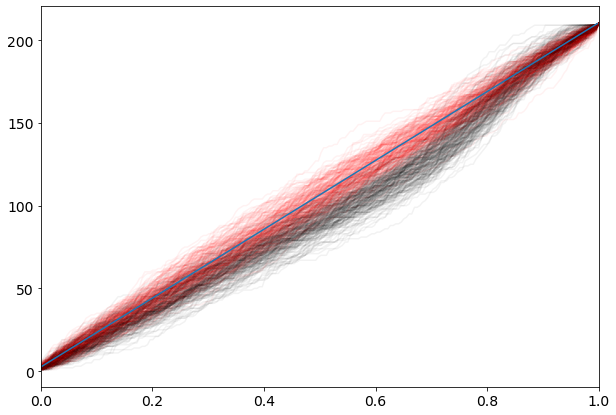

In [323]:
plt.figure(figsize=(10,7))
for i in range(0,200):

    # one with extra gauss
    random = np.random.rand(180)
    norm = np.random.normal(.8, .08, 30)

    norm[np.where(norm<0)] = 1 + norm[np.where(norm < 0)]

    both = np.append(random, norm)
    cumfreq  = np.histogram(both, bins=len(both))[0].cumsum()
    bins = np.linspace(0,1,len(both))
    lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
    plt.plot(bins, cumfreq, alpha=.05, c="k")
    
    # one only uniform
    
    random = np.random.rand(len(both))
    cumfreq  = np.histogram(random, bins=len(both))[0].cumsum()
    
    lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
    plt.plot(bins, cumfreq, alpha=.05, c="r")

    
    
    
    
plt.plot((bins[1:] + bins[:-1]) / 2., lin)
    
plt.xlim(0,1)
# plt.ylim(0, len(both))


# Backlog

In [288]:
f = pd.DataFrame({"freq":counts / aumicphases.sum(axis=1).values, "phase":(bins[:-1]+bins[1:]) / 2})

In [294]:
( f[(f.phase<.25) | (f.phase>.25)].freq.mean(),f[(f.phase<.25) | (f.phase>.25)].freq.std(),
 f[(f.phase>.25) & (f.phase<.75)].freq.mean(),f[(f.phase>.25) & (f.phase<.75)].freq.std())

(0.0018418985872794655,
 0.001830346856519179,
 0.0016096489346704836,
 0.0017443157927139372)

In [289]:
f

,freq,phase
0,0.003279,0.002513
1,0.006623,0.007538
2,0.000000,0.012563
3,0.000000,0.017588
4,0.000000,0.022613
...,...,...
194,0.000000,0.977387
195,0.001656,0.982412
196,0.001653,0.987437
197,0.005000,0.992462


In [314]:
h1 = aumicphases.sum(axis=1).values[:50].sum()
h2 = aumicphases.sum(axis=1).values[50:].sum()

In [315]:
phases = np.array(phases)
f1 = np.where((phases<.25) | (phases>.75))[0].shape[0]
f2 = np.where((phases>.25) & (phases<.75))[0].shape[0]

<ErrorbarContainer object of 3 artists>

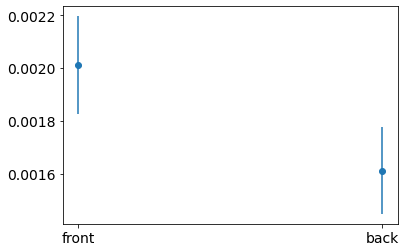

In [321]:
f12, e12 = [f1/h1,  f2/h2], [np.sqrt(f1)/h1, np.sqrt(f2)/h2,]
plt.errorbar(["front", "back"], f12, yerr=e12 ,fmt="o")

In [327]:
print(fr"{f12[0]:.2e} +/- {e12[0]:.2e}")
print(fr"{f12[1]:.2e} +/- {e12[1]:.2e}")

2.01e-03 +/- 1.85e-04
1.61e-03 +/- 1.64e-04


In [383]:
(f12[0] - f12[1]) / f12[0]

0.19824467783875124

In [378]:
e12[0] / f12[0], e12[1] / f12[1]

(0.09205746178983235, 0.10153461651336189)